<h1>
<font color=Green>Neural Networks Project - Gesture Recognition</font>
</h1>
<hr>

<h3>
<font color=Black>Author</font></h3>

- Prashant Mohan Sinha

<hr>

<h2>
<font color=Green>Problem Statement</font>
</h2>

Problem is defined by the recognition of the some of the guestures which are as follows: <br>
- Thumbs up:  Increase the volume <br>
- Thumbs down: Decrease the volume <br>
- Left swipe: 'Jump' backwards 10 seconds <br>
- Right swipe: 'Jump' forward 10 seconds <br>
- Stop: Pause the movie <br>

We need to train the Neural Network Model(s) for the above given gesture patterns.

<h2>
<font color=Green>Dataset</font>
</h2>

The training data consists of a few hundred videos categorised into one of the five classes. <br>

Each video (typically 2-3 seconds long) is divided into a sequence of 30 frames(images). <br>

These videos have been recorded by various people performing one of the five gestures in front of a webcam 
- similar to what the smart TV will use. <br> 

The data is in a zip file. The zip file contains a 'train' and a 'val' folder with two CSV files for the two folders. <br>

These folders are in turn divided into subfolders where each subfolder represents a video of a particular gesture.
Each subfolder, i.e. a video, contains 30 frames (or images). <br>

It is to note that all images in a particular video subfolder have the same dimensions but different videos may have different dimensions.Specifically, videos have two types of dimensions - either 360x360 or 120x160 (depending on the webcam used to record the videos). <br> 

Each row of the CSV file represents one video and contains three main pieces of information: <br>
- name of the subfolder containing the 30 images of the video, <br>
- name of the gesture and <br>
- numeric label (between 0-4) of the video. <br>

<hr>

<h4>
<font color=Green>Import the Requisite Libraries</font>
</h4>

In [1]:
%matplotlib inline

import numpy as np
import os

import datetime
import os

import random as rn

import pathlib
import glob

from PIL import Image
from imageio import imread

import matplotlib.pyplot as plt
import matplotlib.image as img

#from keras import backend as K
import tensorflow as tf

<h4>
<font color=Green>Read the Train & Validation CSV files</font>
</h4>

We set the random seed so that the results don't vary drastically.

In [2]:
seed_value=60

np.random.seed(seed_value)
rn.seed(seed_value)

tf.random.set_seed(seed_value)

In [3]:
# Open & Randomly (to avoid the sequential reading of the given files) Read the Train & Validation csv files
# Change the PATH Location of train folder accoording to your drive location
train_doc = np.random.permutation(open('./Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('./Project_data/val.csv').readlines())

print("Total number of image folders in training set = {0}".format(len(train_doc)))
print("Total number of image folders in validation set = {0}".format(len(val_doc)))

Total number of image folders in training set = 663
Total number of image folders in validation set = 100


In [4]:
# Train & Validation Image Data Path 
train_path = 'Project_data/train/'
val_path = 'Project_data/val/'

<h4>
<font color=Green>Pick a Random Folder from train folder & display the image</font>
</h4>

In [5]:
# Pick a random folder from the train PATH in order to display the image
# Change the PATH Location of train folder accoording to your drive location

sample_pick = rn.choice(train_doc)

data_dir_train_sample = pathlib.Path(train_path + sample_pick.split(';')[0])
label_name = sample_pick.split(';')[1]

# data_dir_train_sample = pathlib.Path('./Project_data/train/' + np.random.permutation(train_doc)[0].split(';')[0])
print(data_dir_train_sample)

# Grab the Images file path from the Randomly picked Folder
image_train_sample = list(data_dir_train_sample.glob('*.png'))

Project_data\train\WIN_20180925_18_06_24_Pro_Stop_new


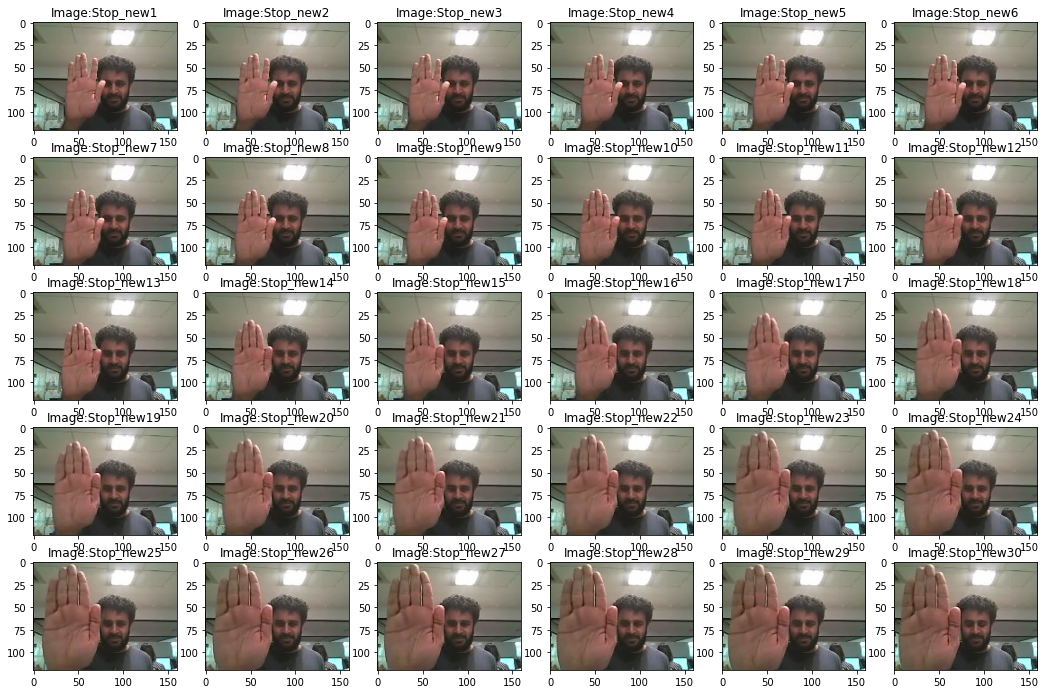

In [6]:
# Plot the Images from the Randomly picked Folder
plt.rcParams["figure.figsize"] = [18, 12]
#plt.rcParams["figure.autolayout"] = True

cnt=1 # Number Counter
for file in image_train_sample:
    plt.subplot(5, 6, cnt)
    image = img.imread(file)
    plt.imshow(image)
    plt.title('Image:'+ label_name + str(cnt))
    cnt +=1
plt.show()

Let's repeat the above process 

In [7]:
# Pick a random folder from the train PATH in order to display the image
# Change the PATH Location of train folder accoording to your drive location

sample_pick2 = np.random.permutation(train_doc)[0]

data_dir_train_sample2 = pathlib.Path(train_path + sample_pick2.split(';')[0])
label_name2 = sample_pick2.split(';')[1]
print(data_dir_train_sample2)

# Grab the Images file path from the Randomly picked Folder
image_train_sample2 = list(data_dir_train_sample2.glob('*.png'))

Project_data\train\WIN_20180926_17_22_53_Pro_Thumbs_Up_new


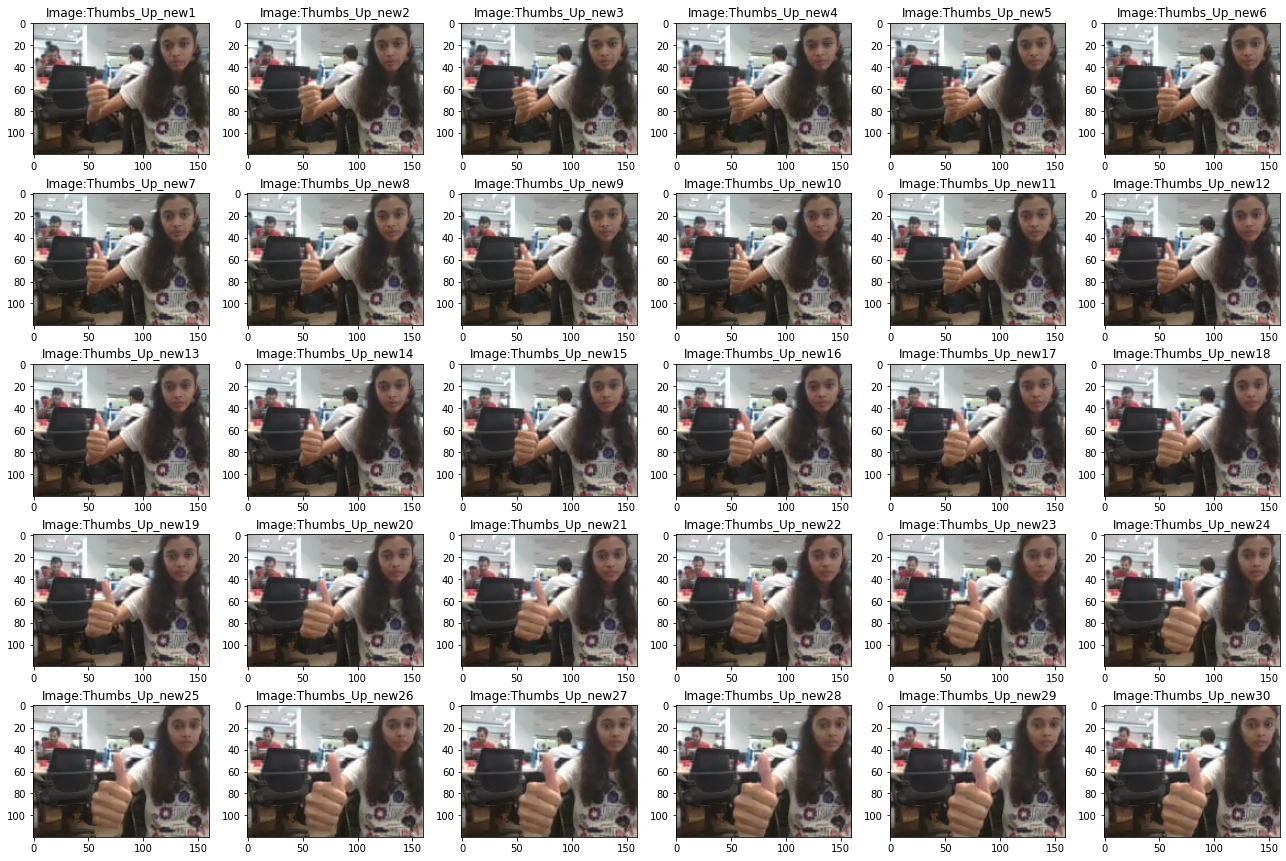

In [8]:
# Plot the Images from the Randomly picked Folder
plt.rcParams["figure.figsize"] = [18, 12]
plt.rcParams["figure.autolayout"] = True

cnt=1 # Number Counter
for file in image_train_sample2:
    plt.subplot(5, 6, cnt)
    image = img.imread(file)
    plt.imshow(image)
    plt.title('Image:'+ label_name2 + str(cnt))
    cnt +=1
plt.show()

Let's repeat the above process again

In [9]:
# Pick a random folder from the train PATH in order to display the image
# Change the PATH Location of train folder accoording to your drive location

sample_pick3 = np.random.permutation(train_doc)[0]

data_dir_train_sample3 = pathlib.Path(train_path + sample_pick3.split(';')[0])
label_name3 = sample_pick3.split(';')[1]
print(data_dir_train_sample3)

# Grab the Images file path from the Randomly picked Folder
image_train_sample3 = list(data_dir_train_sample3.glob('*.png'))

Project_data\train\WIN_20180907_16_12_16_Pro_Thumbs Down_new


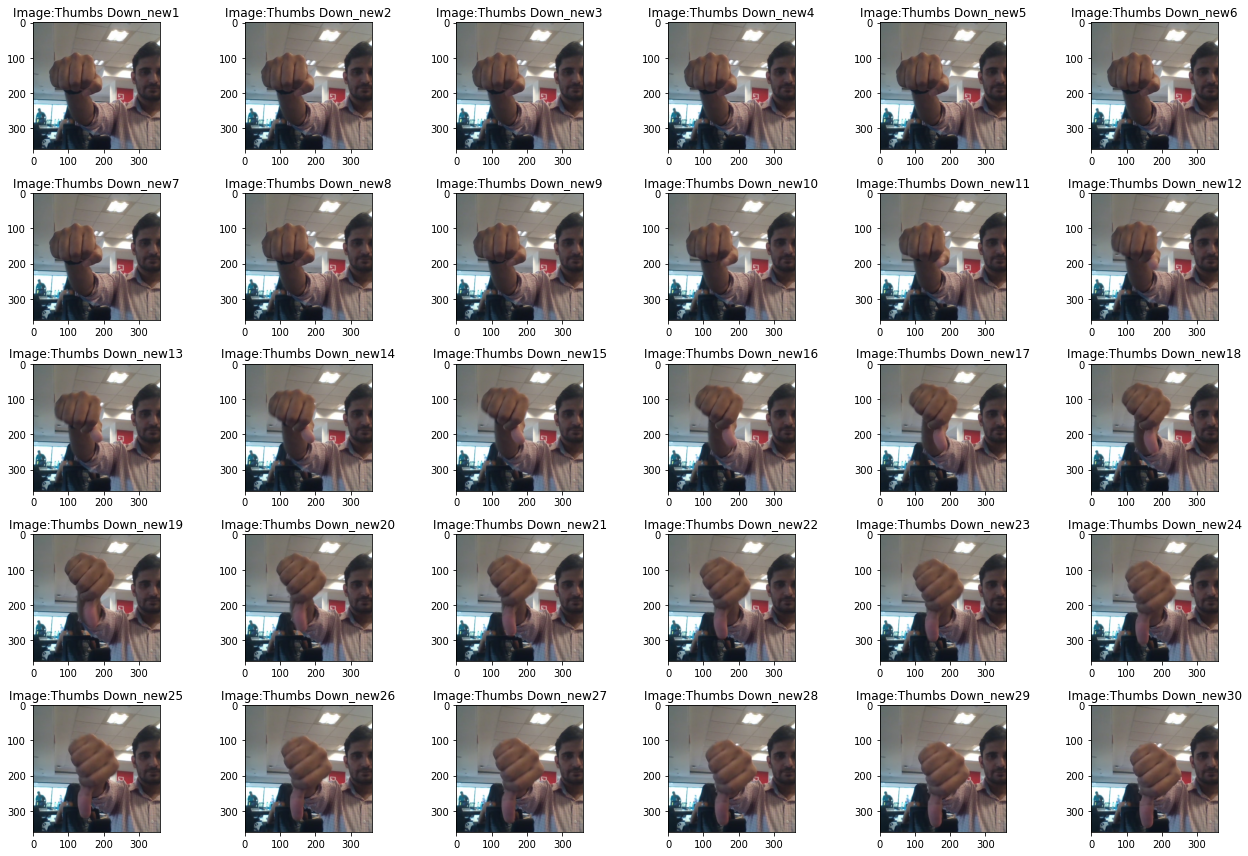

In [10]:
# Plot the Images from the Randomly picked Folder
plt.rcParams["figure.figsize"] = [18, 12]
plt.rcParams["figure.autolayout"] = True

cnt=1 # Number Counter
for file in image_train_sample3:
    plt.subplot(5, 6, cnt)
    image = img.imread(file)
    plt.imshow(image)
    plt.title('Image:'+ label_name3 + str(cnt))
    cnt +=1
plt.show()

<h5>
<font color=Green>Let's check image dimension for Train & Vaildation set Images:</font>
</h5>

In [11]:
folder_list_train = [] # Empty Folder Name List - Train Data
folder_list_val = [] # Empty Folder Name List - Validation Data

w = [] # Empty Image Width List - Train Data Set
h = [] # Empty Image height List - Train Data Set

w_val = [] # Empty Image Width List - Validation Data Set
h_val = [] # Empty Image height List - Validation Data Set

# Looping for Train Folder List
for i in train_doc:
    folder_name = i.split(';')[0]
    folder_list_train.append(folder_name)
    image_path = pathlib.Path(train_path + folder_name)
    image_train_sample = list(image_path.glob('*.png'))[0] # Just check the First Image
    im = Image.open(image_train_sample)
    w1, h1 = im.size
    
    w.append(w1)
    h.append(h1)

# Looping for Validation Folder List    
for i in val_doc:
    folder_name = i.split(';')[0]
    folder_list_val.append(folder_name)
    image_path = pathlib.Path(val_path + folder_name)
    image_val_sample = list(image_path.glob('*.png'))[0] # Just check the First Image
    im = Image.open(image_val_sample)
    w1, h1 = im.size
    
    w_val.append(w1)
    h_val.append(h1)


print("Minimum & Maximum Width of Train set images = {0}, {1}".format(min(w),max(w)))
print("Minimum & Maximum Width of Validation set images = {0}, {1}".format(min(w_val),max(w_val)))

print("Minimum & Maximum Height of Train set images = {0}, {1}".format(min(h),max(h)))
print("Minimum & Maximum Height of Validation set images = {0}, {1}".format(min(h_val),max(h_val)))

Minimum & Maximum Width of Train set images = 160, 360
Minimum & Maximum Width of Validation set images = 160, 360
Minimum & Maximum Height of Train set images = 120, 360
Minimum & Maximum Height of Validation set images = 120, 360


<hr>

#### Observation:

* From the above plot displays, it is observed that some of the images at the begining & at the end are very much same in the nature to its respective ends, hence some of the images we can easliy drop from both ends.

* It is also being observed that we should not crop the images as it may cut out the guesture information which may be present at the edges.

* Minimum Width & Height of the given images are 160 & 120 respectively.

<hr>

<h2>
<font color=Green>Generator</font>
</h2>

In [12]:
# Install the Opencv
!pip install opencv-python

In [13]:
# Import the Opencv Library
import cv2

In [14]:
# Generator Function
def generator(source_path, folder_list, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols):
    
    print( 'Source path = ', source_path, '; batch size =', batch_size)
      
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(t)//batch_size # calculate the number of batches
        
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,nframes,img_dim_rows, img_dim_cols,3)) 
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = img.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                                      
                    #Resize the image
                    im_resized = cv2.resize(image, dsize=(img_dim_rows, img_dim_cols), interpolation=cv2.INTER_CUBIC)
                     
                    #Normalize the each Channel Image Data    
                    batch_data[folder,idx,:,:,0] = im_resized[:,:,0] / im_resized[:,:,0].max()
                    batch_data[folder,idx,:,:,1] = im_resized[:,:,1] / im_resized[:,:,1].max()
                    batch_data[folder,idx,:,:,2] = im_resized[:,:,2] / im_resized[:,:,2].max()
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        
        # write the code for the remaining data points which are left after full batches
        if (len(t) % batch_size) != 0:
            batches = len(t)%batch_size # Remaining Batch
            batch_data = np.zeros((batches,len(img_idx),img_dim_rows, img_dim_cols,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batches,5)) # batch_labels is the one hot representation of the output

            for folder in range(batches): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (num_batches*batches)].split(';')[0])
            
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = img.imread(source_path+'/'+ t[folder + (num_batches*batches)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                                      
                    #Resize the image
                    im_resized = cv2.resize(image, dsize=(img_dim_rows, img_dim_cols), interpolation=cv2.INTER_CUBIC)
                    
                    #Normalize the each Channel Image Data  
                    batch_data[folder,idx,:,:,0] = im_resized[:,:,0] / im_resized[:,:,0].max()
                    batch_data[folder,idx,:,:,1] = im_resized[:,:,1] / im_resized[:,:,1].max()
                    batch_data[folder,idx,:,:,2] = im_resized[:,:,2] / im_resized[:,:,2].max()

                    batch_labels[folder, int(t[folder + (num_batches*batches)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels

It is to note that a video images are represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

We need to create different models without over-writing each other. Hence, these models need to have time-stamp for identifiable model naming.

In [15]:
# Current Date Time
curr_dt_time = datetime.datetime.now()

# Total Number of Training & Validation Sequences
num_train_sequences = len(train_doc)
print('Number of training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('Number of validation sequences =', num_val_sequences)

Number of training sequences = 663
Number of validation sequences = 100


<h2>
<font color=Green>Modelling</font>
</h2>

#### Model Test Experimentations:
    1. Conv3D with use of MaxPooling3D model building
    2. TimeDistributed Conv2D + RNN model building

#### **EX 1: Model 1: Conv3D**
Let us keep the first model with highest number of layers and then based on its performance, we will further experiment with other hyperparameters

In [16]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, BatchNormalization, Activation, Dropout
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.optimizers import Adam
from tensorflow.python.keras.utils.layer_utils import count_params

In [17]:
# Define the 3D Model1

def func_model3dcnn(input_shape):
    
    model3d = Sequential()
    
    # Layer1
    model3d.add(Conv3D(16, (3, 3, 3), padding='same',
                       input_shape=input_shape))
    model3d.add(Activation('relu'))
    model3d.add(BatchNormalization())
    model3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model3d.add(Dropout(0.1))
    
    # Layer2
    model3d.add(Conv3D(32, (3, 3, 3), padding='same'))
    model3d.add(Activation('relu'))
    model3d.add(BatchNormalization())
    model3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model3d.add(Dropout(0.1))
    
    # Layer3
    model3d.add(Conv3D(64, (3, 3, 3), padding='same'))
    model3d.add(Activation('relu'))
    model3d.add(BatchNormalization())
    model3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model3d.add(Dropout(0.1))
    
    # Layer4
    model3d.add(Conv3D(128, (3, 3, 3), padding='same'))
    model3d.add(Activation('relu'))
    model3d.add(BatchNormalization())
    model3d.add(MaxPooling3D(pool_size=(1, 1, 1)))
    model3d.add(Dropout(0.25))
    
    model3d.add(Flatten()) # Flatenning
    
    # Dense Layer -1
    model3d.add(Dense(128,activation='relu'))
    model3d.add(BatchNormalization())
    model3d.add(Dropout(0.25))
    
    # Dense Layer -2
    model3d.add(Dense(64,activation='relu'))
    model3d.add(BatchNormalization())
    

    #softmax layer - Output Layer
    model3d.add(Dense(5, activation='softmax'))

    # Compile with optimiser (selected Adam Optimiser)
    model3d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    
    #Print Model Summary
    print (model3d.summary())
    
    # Return 3D CNN Model
    return model3d



In [18]:
# Parameter Variables
#create a list of image numbers you want to use for a particular video
img_idx = list(range(3,28,2))

#Total Frames of Images
nframes = len(img_idx)

# Maximum Image Dimension to keep the resolution as much as possible
img_dim_rows = 120
img_dim_cols = 120

In [19]:
# Input Dimension
input_shape=(nframes, img_dim_rows, img_dim_cols, 3)

# 3D CNN Model Architecture
model3d = func_model3dcnn(input_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 13, 120, 120, 16)  1312      
                                                                 
 activation (Activation)     (None, 13, 120, 120, 16)  0         
                                                                 
 batch_normalization (BatchN  (None, 13, 120, 120, 16)  64       
 ormalization)                                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 6, 60, 60, 16)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 6, 60, 60, 16)     0         
                                                                 
 conv3d_1 (Conv3D)           (None, 6, 60, 60, 32)     1

In [20]:
# Define Batch Size & Epoch, 

# To start from low value to higher values 
# such that machine memeory can handle it appropiately 
batch_size = 30

# choose the number of epochs
num_epochs = 30
print ('Number of epochs =', num_epochs)

Number of epochs = 30


In [21]:
# Call the generator function
train_generator = generator(train_path, train_doc, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols)
val_generator = generator(val_path, val_doc, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols)

In [22]:
model_name = 'Model1_3DCNN' +'_' +'gesture_recognition' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)

# write the REducelronplateau code here
# ModelCheckpoint - saves weight and model after every epoch
LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10, verbose = 0, 
                       mode = "auto", min_delta=0.0001, cooldown = 0, min_lr = 0)
callbacks_list = [checkpoint, LR]

In [23]:
# If there are 100 images and 10 as batch size, then there will be 10 batches and 10 epochs

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)

# If there ar 103 images and 10 as batch size, then there will be 10 epochs for 10 batches and one more epoch for the pending 3 images.
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [24]:
# Model Fitting
model1_3dCNN_fit = model3d.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                               callbacks=callbacks_list, validation_data=val_generator,validation_steps=validation_steps, 
                               class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/train/ ; batch size = 30
Epoch 1/30
23/23 [==============================] - 108s 4s/step - loss: 1.2690 - categorical_accuracy: 0.5158 - val_loss: 2.3570 - val_categorical_accuracy: 0.2400 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 32s 1s/step - loss: 0.8376 - categorical_accuracy: 0.6546 - val_loss: 5.3885 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 32s 1s/step - loss: 0.6660 - categorical_accuracy: 0.7572 - val_loss: 8.6462 - val_categorical_accuracy: 0.2200 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 35s 2s/step - loss: 0.4683 - categorical_accuracy: 0.8296 - val_loss: 8.5191 - val_categorical_accuracy: 0.2200 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 34s 2s/step - loss: 0.3817 - categorical_accuracy: 0.8824 - val_loss: 6.9327 - val_categorical_accuracy: 0.2500 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 34s 2s/st

<h5>
<font color=Green>Print Model Accuracy & Loss:</font>
</h5>

In [25]:
# Define the Function to Model parameters
def model_best_output(model_fit_name, model_name):
    
    # Model Accuracy
    Train_accu = model_fit_name.history['categorical_accuracy']
    Val_accu = model_fit_name.history['val_categorical_accuracy']

    # Model Loff
    Train_loss = model_fit_name.history['loss']
    Val_loss = model_fit_name.history['val_loss']
    
    # Index of minimum validation loss 
    index_val_acc_max = Val_accu.index(max(Val_accu))

    # Find Value @ minimum accuracy difference
    epoch_min_val_loss = index_val_acc_max+1

    train_accu_min_val_loss = round(Train_accu[index_val_acc_max],4)
    val_accu_min_val_loss = round(Val_accu[index_val_acc_max], 4)

    train_loss_min_val_loss = round(Train_loss[index_val_acc_max],4)
    val_loss_min_val_loss = round(Val_loss[index_val_acc_max],4)


    # 3D CNN Model - RUN 1 Trainable Params
    trainable_count = count_params(model_name.trainable_weights)
    non_trainable_count = count_params(model_name.non_trainable_weights)
    total_param = trainable_count + non_trainable_count

    print('Epoch number @ max(val_acc) = ', epoch_min_val_loss)
    print('Model Train Accuracy @ max(val_acc) = ', train_accu_min_val_loss)
    print('Model Validation Accuracy @ max(val_acc) = ', val_accu_min_val_loss)
    
    print('Model Train Loss @ max(val_acc) = ', train_loss_min_val_loss)
    print('Model Validation Loss @ max(val_acc) = ', val_loss_min_val_loss)

    print('Total params = ',total_param)
    print('Trainable params = ',trainable_count) 
    print('Non-trainable params = ',non_trainable_count)
    
    run_list = [epoch_min_val_loss, train_accu_min_val_loss, val_accu_min_val_loss, 
                train_loss_min_val_loss,  val_loss_min_val_loss, 
                total_param, trainable_count, non_trainable_count]
    
    return run_list


In [26]:
# Print Optimum Output Values
run_list = model_best_output(model1_3dCNN_fit, model3d)

Epoch number @ max(val_acc) =  30
Model Train Accuracy @ max(val_acc) =  0.9955
Model Validation Accuracy @ max(val_acc) =  0.79
Model Train Loss @ max(val_acc) =  0.0367
Model Validation Loss @ max(val_acc) =  0.7807
Total params =  3988677
Trainable params =  3987813
Non-trainable params =  864


<hr>

#### Observation:

* The difference between train accuracy & validation accuracy is 0.21, which is very high, thus the model is overfitted one.

* Hence, we further tweak the 3D CNN architecture by implementing more drop outs & more neurons to last dense layers & check the performance output.

<hr>

<h5>
<font color=Green>Plot the training/validation accuracies/losses:</font>
</h5>

In [27]:
# function to plot the training/validation accuracies/losses.

def plot(history_model,title_name, num_epochs):
    
    x = list(range(1, num_epochs+1))
    
    fig = plt.figure(figsize=(16,6))
    plt.subplot(1, 2, 1)
    
    # summarize history for accuracy
    plt.plot(x, history_model.history['categorical_accuracy'])
    plt.plot(x, history_model.history['val_categorical_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper left')
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    
    plt.subplot(1, 2, 2)
    
    # summarize history for loss
    plt.plot(x, history_model.history['loss'])
    plt.plot(x, history_model.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    
    fig.suptitle(title_name, fontsize=16)
    
    plt.show()

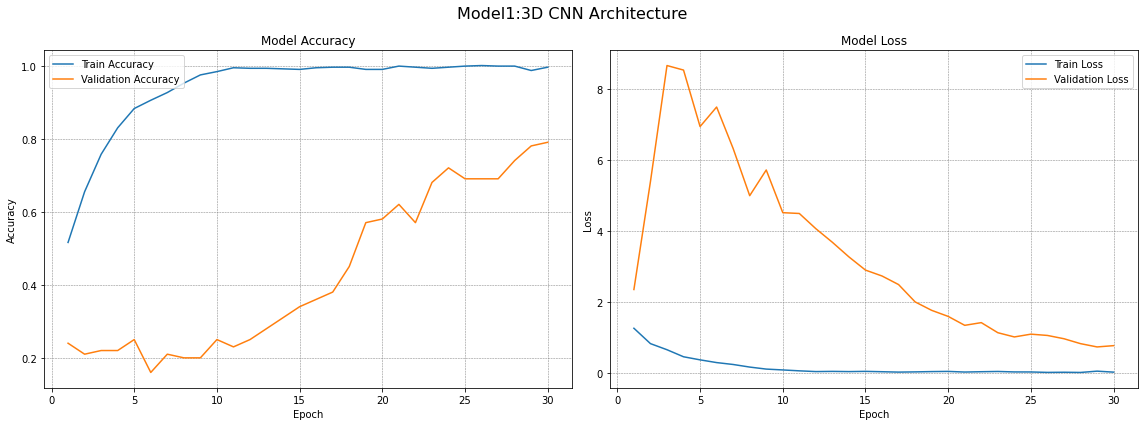

In [28]:
# Plot the Model Accuracy & Loss
plot(model1_3dCNN_fit, 'Model1:3D CNN Architecture', num_epochs)

<h5>
<font color=Green>Create Dataframe:</font>
</h5>

In [29]:
# Import Pandas Library
import pandas as pd

In [104]:
# Dictionary List
item_dic = {
  "Description": ['Name', 'Neurons(L1-L6)','Filter Size(L1-L4)','Activation(L1-L6)','BatchNormalization(L1-L6)',
                  'MaxPooling(L1-L4)','Drop-outs(L1-L6)','Optimiser', 'Batch Size','Total Epoch','Epoch #', 
                  'Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss',
                  'Total params', 'Trainable params', 'Non-trainable params', 'Obervation']
}

In [105]:
# Make a Empty DataFrame
result_table = pd.DataFrame(item_dic)
result_table.index.name='SL'

# Permanently changes the pandas settings
pd.set_option('display.max_rows', None)

In [106]:
# Add 3D CNN Model Run1 Result to Dataframe
neurons = '16-32-64-128-128(D)-64(D)-5(O)'
filtersize = '3-3-3-3'
activationtype = 'relu, output:softmax'
maxpoolingtype = '2-2-2-1'
dropouttype = '0.1-0.1-0.1-0.25-0.25'

col_list = ['3D CNN', neurons, filtersize, activationtype, 'yes', maxpoolingtype, dropouttype, 'Adam', batch_size, num_epochs]
col_list.extend(run_list)
col_list.extend(['Overfit Model'])

result_table['Model1'] = col_list

# Display the head
display(result_table)

# # Converts the dataframe into str object with formatting
# print(result_table.to_string()

Description                          Model1
SL                                                           
0                        Name                          3D CNN
1              Neurons(L1-L6)  16-32-64-128-128(D)-64(D)-5(O)
2          Filter Size(L1-L4)                         3-3-3-3
3           Activation(L1-L6)            relu, output:softmax
4   BatchNormalization(L1-L6)                             yes
5           MaxPooling(L1-L4)                         2-2-2-1
6            Drop-outs(L1-L6)           0.1-0.1-0.1-0.25-0.25
7                   Optimiser                            Adam
8                  Batch Size                              30
9                 Total Epoch                              30
10                    Epoch #                              30
11             Train Accuracy                          0.9955
12        Validation Accuracy                            0.79
13                 Train Loss                          0.0367
14            Validation Loss                          0.7807
15               Total params                         3988677
16           Trainable params                         3987813
17       Non-trainable params                             864
18                 Obervation                   Overfit Model

#### **EX 1: Model 2: Conv3D**
More Dropouts & more neurons to the flattened layer added to Model1 3D CNN 

In [33]:
# Define the 3D Model1

def func_model2_3dcnn(input_shape):
    
    model2_3d = Sequential()
    
    # Layer1
    model2_3d.add(Conv3D(16, (3, 3, 3), padding='same',
                       input_shape=input_shape))
    model2_3d.add(Activation('relu'))
    model2_3d.add(BatchNormalization())
    model2_3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model2_3d.add(Dropout(0.3))
    
    # Layer2
    model2_3d.add(Conv3D(32, (3, 3, 3), padding='same'))
    model2_3d.add(Activation('relu'))
    model2_3d.add(BatchNormalization())
    model2_3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model2_3d.add(Dropout(0.3))
    
    # Layer3
    model2_3d.add(Conv3D(64, (3, 3, 3), padding='same'))
    model2_3d.add(Activation('relu'))
    model2_3d.add(BatchNormalization())
    model2_3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model2_3d.add(Dropout(0.3))
    
    # Layer4
    model2_3d.add(Conv3D(128, (3, 3, 3), padding='same'))
    model2_3d.add(Activation('relu'))
    model2_3d.add(BatchNormalization())
    model2_3d.add(MaxPooling3D(pool_size=(1, 1, 1)))
    model2_3d.add(Dropout(0.4))
    
    model2_3d.add(Flatten()) # Flatenning
    
    # Dense Layer -1
    model2_3d.add(Dense(128,activation='relu'))
    model2_3d.add(BatchNormalization())
    model2_3d.add(Dropout(0.4))
    
    # Dense Layer -2
    model2_3d.add(Dense(128,activation='relu'))
    model2_3d.add(BatchNormalization())
    

    #softmax layer - Output Layer
    model2_3d.add(Dense(5, activation='softmax'))

    # Compile with optimiser (selected Adam Optimiser)
    model2_3d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    
    #Print Model Summary
    print (model2_3d.summary())
    
    # Return 3D CNN Model
    return model2_3d

In [34]:
# 3D CNN Model2 Function call
# Keep the input shape & other parameters such as img_idx is same as Model1
model2_3d = func_model2_3dcnn(input_shape)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_4 (Conv3D)           (None, 13, 120, 120, 16)  1312      
                                                                 
 activation_4 (Activation)   (None, 13, 120, 120, 16)  0         
                                                                 
 batch_normalization_6 (Batc  (None, 13, 120, 120, 16)  64       
 hNormalization)                                                 
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 6, 60, 60, 16)    0         
 3D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 6, 60, 60, 16)     0         
                                                                 
 conv3d_5 (Conv3D)           (None, 6, 60, 60, 32)    

In [35]:
# Batch Size & Epoch - Same as Model1
# batch_size = 30
# num_epochs = 30

# Call the generator function
train_generator = generator(train_path, train_doc, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols)
val_generator = generator(val_path, val_doc, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols)

In [36]:
model_name = 'Model2_3DCNN' +'_' +'gesture_recognition' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)

# write the REducelronplateau code here
# ModelCheckpoint - saves weight and model after every epoch
LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10, verbose = 0, 
                       mode = "auto", min_delta=0.0001, cooldown = 0, min_lr = 0)
callbacks_list = [checkpoint, LR]

In [37]:
# If there are 100 images and 10 as batch size, then there will be 10 batches and 10 epochs

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)

# If there ar 103 images and 10 as batch size, then there will be 10 epochs for 10 batches and one more epoch for the pending 3 images.
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [38]:
# Model Fitting
model2_3dCNN_fit = model2_3d.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                               callbacks=callbacks_list, validation_data=val_generator,validation_steps=validation_steps, 
                               class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/train/ ; batch size = 30
Epoch 1/30
23/23 [==============================] - 46s 2s/step - loss: 1.4361 - categorical_accuracy: 0.4736 - val_loss: 3.6421 - val_categorical_accuracy: 0.1700 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 41s 2s/step - loss: 0.9509 - categorical_accuracy: 0.6425 - val_loss: 4.1558 - val_categorical_accuracy: 0.1800 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 40s 2s/step - loss: 0.7234 - categorical_accuracy: 0.7436 - val_loss: 5.8812 - val_categorical_accuracy: 0.1500 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 40s 2s/step - loss: 0.6111 - categorical_accuracy: 0.7632 - val_loss: 4.7693 - val_categorical_accuracy: 0.2300 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 41s 2s/step - loss: 0.5178 - categorical_accuracy: 0.8281 - val_loss: 5.9677 - val_categorical_accuracy: 0.2300 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 41s 2s/ste

In [39]:
# Print Optimum Output Values
run2_list = model_best_output(model2_3dCNN_fit, model2_3d)

Epoch number @ max(val_acc) =  29
Model Train Accuracy @ max(val_acc) =  0.9819
Model Validation Accuracy @ max(val_acc) =  0.67
Model Train Loss @ max(val_acc) =  0.0985
Model Validation Loss @ max(val_acc) =  1.0548
Total params =  3997509
Trainable params =  3996517
Non-trainable params =  992


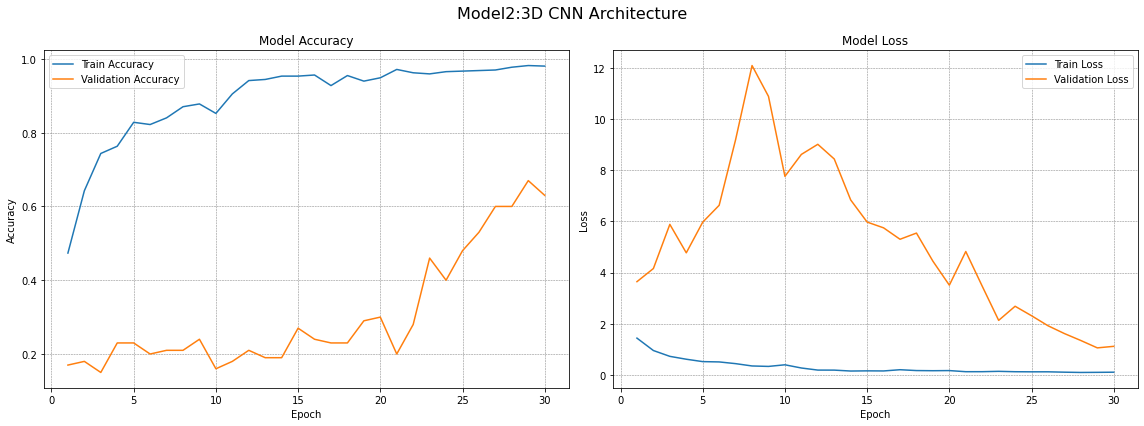

In [40]:
# Plot the Model Accuracy & Loss
plot(model2_3dCNN_fit, 'Model2:3D CNN Architecture', num_epochs)

<hr>

#### Observation:

* The difference between train accuracy(0.98) & validation accuracy(0.72) is 0.26, which is even higher than 3D CNN Model1. Model2 is still a overfit one.

* Validation accuracy increases rapidly with smaller learning rate (pow(10,-4)) after 20th epoch. Validation is constantly decreasing after the 5th epoch, which is overall a good sign.

* Hence, we further tweak the 3D CNN architecture by implementing same drop outs as Model2 & less neurons to both dense layers & check the performance output.

<hr>

In [107]:
# Add 3D CNN Model2 Run Result to Dataframe
neurons = '16-32-64-128-128(D)-128(D)-5(O)'
filtersize = '3-3-3-3'
activationtype = 'relu, output:softmax'
maxpoolingtype = '2-2-2-1'
dropouttype = '0.3-0.3-0.3-0.4-0.4'

col_list = ['3D CNN', neurons, filtersize, activationtype, 'yes', maxpoolingtype, dropouttype, 'Adam', batch_size, num_epochs]
col_list.extend(run2_list)
col_list.extend(['Overfit increased than Model1.'])

result_table['Model2'] = col_list

# Display the head
display(result_table)

Description                          Model1  \
SL                                                              
0                        Name                          3D CNN   
1              Neurons(L1-L6)  16-32-64-128-128(D)-64(D)-5(O)   
2          Filter Size(L1-L4)                         3-3-3-3   
3           Activation(L1-L6)            relu, output:softmax   
4   BatchNormalization(L1-L6)                             yes   
5           MaxPooling(L1-L4)                         2-2-2-1   
6            Drop-outs(L1-L6)           0.1-0.1-0.1-0.25-0.25   
7                   Optimiser                            Adam   
8                  Batch Size                              30   
9                 Total Epoch                              30   
10                    Epoch #                              30   
11             Train Accuracy                          0.9955   
12        Validation Accuracy                            0.79   
13                 Train Loss                          0.0367   
14            Validation Loss                          0.7807   
15               Total params                         3988677   
16           Trainable params                         3987813   
17       Non-trainable params                             864   
18                 Obervation                   Overfit Model   

                             Model2  
SL                                   
0                            3D CNN  
1   16-32-64-128-128(D)-128(D)-5(O)  
2                           3-3-3-3  
3              relu, output:softmax  
4                               yes  
5                           2-2-2-1  
6               0.3-0.3-0.3-0.4-0.4  
7                              Adam  
8                                30  
9                                30  
10                               29  
11                           0.9819  
12                             0.67  
13                           0.0985  
14                           1.0548  
15                          3997509  
16                          3996517  
17                              992  
18   Overfit increased than Model1.

#### **EX 1: Model 3: Conv3D**
Lets check the impact of the Neuron with less neurons to the dense layer & with same dropouts.

In [42]:
# Define the 3D Model3

def func_model3_3dcnn(input_shape):
    
    model3_3d = Sequential()
    
    # Layer1
    model3_3d.add(Conv3D(16, (3, 3, 3), padding='same',
                       input_shape=input_shape))
    model3_3d.add(Activation('relu'))
    model3_3d.add(BatchNormalization())
    model3_3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model3_3d.add(Dropout(0.3))
    
    # Layer2
    model3_3d.add(Conv3D(32, (3, 3, 3), padding='same'))
    model3_3d.add(Activation('relu'))
    model3_3d.add(BatchNormalization())
    model3_3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model3_3d.add(Dropout(0.3))
    
    # Layer3
    model3_3d.add(Conv3D(64, (3, 3, 3), padding='same'))
    model3_3d.add(Activation('relu'))
    model3_3d.add(BatchNormalization())
    model3_3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model3_3d.add(Dropout(0.3))
    
    # Layer4
    model3_3d.add(Conv3D(128, (3, 3, 3), padding='same'))
    model3_3d.add(Activation('relu'))
    model3_3d.add(BatchNormalization())
    model3_3d.add(MaxPooling3D(pool_size=(1, 1, 1)))
    model3_3d.add(Dropout(0.4))
    
    model3_3d.add(Flatten()) # Flatenning
    
    # Dense Layer -1
    model3_3d.add(Dense(64,activation='relu'))
    model3_3d.add(BatchNormalization())
    model3_3d.add(Dropout(0.4))
    
    # Dense Layer -2
    model3_3d.add(Dense(64,activation='relu'))
    model3_3d.add(BatchNormalization())
    

    #softmax layer - Output Layer
    model3_3d.add(Dense(5, activation='softmax'))

    # Compile with optimiser (selected Adam Optimiser)
    model3_3d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    
    #Print Model Summary
    print (model3_3d.summary())
    
    # Return 3D CNN Model
    return model3_3d

In [43]:
# 3D CNN Model3 Function call
# Keep the input shape & other parameters such as img_idx is same as Model1
model3_3d = func_model3_3dcnn(input_shape)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_8 (Conv3D)           (None, 13, 120, 120, 16)  1312      
                                                                 
 activation_8 (Activation)   (None, 13, 120, 120, 16)  0         
                                                                 
 batch_normalization_12 (Bat  (None, 13, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_8 (MaxPooling  (None, 6, 60, 60, 16)    0         
 3D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 6, 60, 60, 16)     0         
                                                                 
 conv3d_9 (Conv3D)           (None, 6, 60, 60, 32)    

An initial trial of Epoch=30 for the Model 3 run was not sufficient enough thus number of Epoch increased to 40.

In [44]:
# Batch Size & Epoch - Same as Model1
# batch_size = 30
num_epochs = 40 # Number of Epoch set to 40

# Call the generator function
train_generator = generator(train_path, train_doc, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols)
val_generator = generator(val_path, val_doc, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols)

In [45]:
model_name = 'Model3_3DCNN' +'_' +'gesture_recognition' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)

# write the REducelronplateau code here
# ModelCheckpoint - saves weight and model after every epoch
LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10, verbose = 0, 
                       mode = "auto", min_delta=0.0001, cooldown = 0, min_lr = 0)
callbacks_list = [checkpoint, LR]

In [46]:
# If there are 100 images and 10 as batch size, then there will be 10 batches and 10 epochs

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)

# If there ar 103 images and 10 as batch size, then there will be 10 epochs for 10 batches and one more epoch for the pending 3 images.
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [47]:
# Model Fitting
model3_3dCNN_fit = model3_3d.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                               callbacks=callbacks_list, validation_data=val_generator,validation_steps=validation_steps, 
                               class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/train/ ; batch size = 30
Epoch 1/40
23/23 [==============================] - 44s 2s/step - loss: 1.4561 - categorical_accuracy: 0.4027 - val_loss: 2.7105 - val_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 2/40
23/23 [==============================] - 41s 2s/step - loss: 1.1599 - categorical_accuracy: 0.5204 - val_loss: 3.2974 - val_categorical_accuracy: 0.1600 - lr: 0.0010
Epoch 3/40
23/23 [==============================] - 41s 2s/step - loss: 0.9377 - categorical_accuracy: 0.6335 - val_loss: 3.8015 - val_categorical_accuracy: 0.2300 - lr: 0.0010
Epoch 4/40
23/23 [==============================] - 40s 2s/step - loss: 0.7914 - categorical_accuracy: 0.6863 - val_loss: 3.8442 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 5/40
23/23 [==============================] - 41s 2s/step - loss: 0.7420 - categorical_accuracy: 0.7255 - val_loss: 5.9021 - val_categorical_accuracy: 0.2500 - lr: 0.0010
Epoch 6/40
23/23 [==============================] - 41s 2s/ste

In [48]:
# Print Optimum Output Values
run3_list = model_best_output(model3_3dCNN_fit, model3_3d)

Epoch number @ max(val_acc) =  37
Model Train Accuracy @ max(val_acc) =  0.9713
Model Validation Accuracy @ max(val_acc) =  0.85
Model Train Loss @ max(val_acc) =  0.1353
Model Validation Loss @ max(val_acc) =  0.5015
Total params =  2141061
Trainable params =  2140325
Non-trainable params =  736


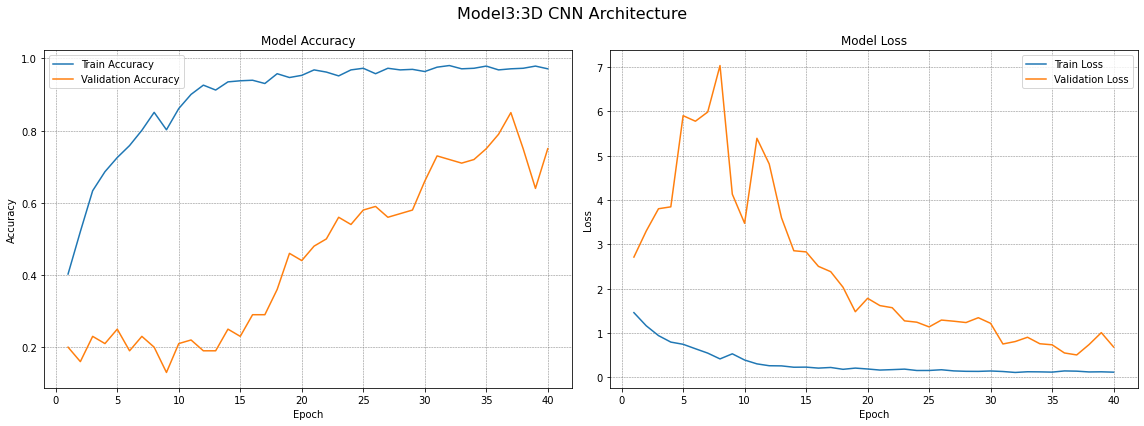

In [49]:
# Plot the Model Accuracy & Loss
plot(model3_3dCNN_fit, 'Model3:3D CNN Architecture', num_epochs)

<hr>

#### Observation:

* The difference between train accuracy (0.97) & validation accuracy(0.85) is 0.12, Overfitting issue resolved to a great extent. It is also observed in value drop in training & validation loss values. A overall good sign. 

<hr>

In [108]:
# Add 3D CNN Model3 Run Result to Dataframe
neurons = '16-32-64-128-64(D)-64(D)-5(O)'
filtersize = '3-3-3-3'
activationtype = 'relu, output:softmax'
maxpoolingtype = '2-2-2-1'
dropouttype = '0.3-0.3-0.3-0.4-0.4'

col_list = ['3D CNN', neurons, filtersize, activationtype, 'yes', maxpoolingtype, dropouttype, 'Adam', batch_size, num_epochs]
col_list.extend(run3_list)
col_list.extend(['Overfit reduced.'])

result_table['Model3'] = col_list

# Display the head
display(result_table)

Description                          Model1  \
SL                                                              
0                        Name                          3D CNN   
1              Neurons(L1-L6)  16-32-64-128-128(D)-64(D)-5(O)   
2          Filter Size(L1-L4)                         3-3-3-3   
3           Activation(L1-L6)            relu, output:softmax   
4   BatchNormalization(L1-L6)                             yes   
5           MaxPooling(L1-L4)                         2-2-2-1   
6            Drop-outs(L1-L6)           0.1-0.1-0.1-0.25-0.25   
7                   Optimiser                            Adam   
8                  Batch Size                              30   
9                 Total Epoch                              30   
10                    Epoch #                              30   
11             Train Accuracy                          0.9955   
12        Validation Accuracy                            0.79   
13                 Train Loss                          0.0367   
14            Validation Loss                          0.7807   
15               Total params                         3988677   
16           Trainable params                         3987813   
17       Non-trainable params                             864   
18                 Obervation                   Overfit Model   

                             Model2                         Model3  
SL                                                                  
0                            3D CNN                         3D CNN  
1   16-32-64-128-128(D)-128(D)-5(O)  16-32-64-128-64(D)-64(D)-5(O)  
2                           3-3-3-3                        3-3-3-3  
3              relu, output:softmax           relu, output:softmax  
4                               yes                            yes  
5                           2-2-2-1                        2-2-2-1  
6               0.3-0.3-0.3-0.4-0.4            0.3-0.3-0.3-0.4-0.4  
7                              Adam                           Adam  
8                                30                             30  
9                                30                             30  
10                               29                             37  
11                           0.9819                         0.9713  
12                             0.67                           0.85  
13                           0.0985                         0.1353  
14                           1.0548                         0.5015  
15                          3997509                        2141061  
16                          3996517                        2140325  
17                              992                            736  
18   Overfit increased than Model1.               Overfit reduced.

#### **EX 1: Model 4: Conv3D**
More Dropouts added to the dense layer only to Model2 3D CNN 

In [51]:
# Define the 3D Model1

def func_model4_3dcnn(input_shape):
    
    model4_3d = Sequential()
    
    # Layer1
    model4_3d.add(Conv3D(16, (3, 3, 3), padding='same',
                       input_shape=input_shape))
    model4_3d.add(Activation('relu'))
    model4_3d.add(BatchNormalization())
    model4_3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
    
    # Layer2
    model4_3d.add(Conv3D(32, (3, 3, 3), padding='same'))
    model4_3d.add(Activation('relu'))
    model4_3d.add(BatchNormalization())
    model4_3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
    
    # Layer3
    model4_3d.add(Conv3D(64, (3, 3, 3), padding='same'))
    model4_3d.add(Activation('relu'))
    model4_3d.add(BatchNormalization())
    model4_3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
    
    # Layer4
    model4_3d.add(Conv3D(128, (3, 3, 3), padding='same'))
    model4_3d.add(Activation('relu'))
    model4_3d.add(BatchNormalization())
    model4_3d.add(MaxPooling3D(pool_size=(1, 1, 1)))
    model4_3d.add(Dropout(0.5))
    
    model4_3d.add(Flatten()) # Flatenning
    
    # Dense Layer -1
    model4_3d.add(Dense(128,activation='relu'))
    model4_3d.add(BatchNormalization())
    model4_3d.add(Dropout(0.5))
    
    # Dense Layer -2
    model4_3d.add(Dense(128,activation='relu'))
    model4_3d.add(BatchNormalization())
    

    #softmax layer - Output Layer
    model4_3d.add(Dense(5, activation='softmax'))

    # Compile with optimiser (selected Adam Optimiser)
    model4_3d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    
    #Print Model Summary
    print (model4_3d.summary())
    
    # Return 3D CNN Model
    return model4_3d

In [52]:
# 3D CNN Model2 Function call
# Keep the input shape & other parameters such as img_idx is same as Model1
model4_3d = func_model4_3dcnn(input_shape)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_12 (Conv3D)          (None, 13, 120, 120, 16)  1312      
                                                                 
 activation_12 (Activation)  (None, 13, 120, 120, 16)  0         
                                                                 
 batch_normalization_18 (Bat  (None, 13, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_12 (MaxPoolin  (None, 6, 60, 60, 16)    0         
 g3D)                                                            
                                                                 
 conv3d_13 (Conv3D)          (None, 6, 60, 60, 32)     13856     
                                                                 
 activation_13 (Activation)  (None, 6, 60, 60, 32)    

In [53]:
# Batch Size & Epoch - Same as Model1
#batch_size = 30
num_epochs = 40

# Call the generator function
train_generator = generator(train_path, train_doc, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols)
val_generator = generator(val_path, val_doc, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols)

In [54]:
model_name = 'Model4_3DCNN' +'_' +'gesture_recognition' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)

# write the REducelronplateau code here
# ModelCheckpoint - saves weight and model after every epoch
LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10, verbose = 0, 
                       mode = "auto", min_delta=0.0001, cooldown = 0, min_lr = 0)
callbacks_list = [checkpoint, LR]

In [55]:
# If there are 100 images and 10 as batch size, then there will be 10 batches and 10 epochs

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)

# If there ar 103 images and 10 as batch size, then there will be 10 epochs for 10 batches and one more epoch for the pending 3 images.
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [56]:
# Model Fitting
model4_3dCNN_fit = model4_3d.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                               callbacks=callbacks_list, validation_data=val_generator,validation_steps=validation_steps, 
                               class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/train/ ; batch size = 30
Epoch 1/40
23/23 [==============================] - 43s 2s/step - loss: 1.5270 - categorical_accuracy: 0.4359 - val_loss: 1.7496 - val_categorical_accuracy: 0.3100 - lr: 0.0010
Epoch 2/40
23/23 [==============================] - 40s 2s/step - loss: 0.9748 - categorical_accuracy: 0.6078 - val_loss: 2.8533 - val_categorical_accuracy: 0.1800 - lr: 0.0010
Epoch 3/40
23/23 [==============================] - 40s 2s/step - loss: 0.7180 - categorical_accuracy: 0.7406 - val_loss: 3.8316 - val_categorical_accuracy: 0.2200 - lr: 0.0010
Epoch 4/40
23/23 [==============================] - 39s 2s/step - loss: 0.6489 - categorical_accuracy: 0.7572 - val_loss: 4.7108 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 5/40
23/23 [==============================] - 40s 2s/step - loss: 0.6816 - categorical_accuracy: 0.7300 - val_loss: 5.1629 - val_categorical_accuracy: 0.2400 - lr: 0.0010
Epoch 6/40
23/23 [==============================] - 40s 2s/ste

In [57]:
# Print Optimum Output Values
run4_list = model_best_output(model4_3dCNN_fit, model4_3d)

Epoch number @ max(val_acc) =  30
Model Train Accuracy @ max(val_acc) =  0.9246
Model Validation Accuracy @ max(val_acc) =  0.82
Model Train Loss @ max(val_acc) =  0.2355
Model Validation Loss @ max(val_acc) =  0.5392
Total params =  3997509
Trainable params =  3996517
Non-trainable params =  992


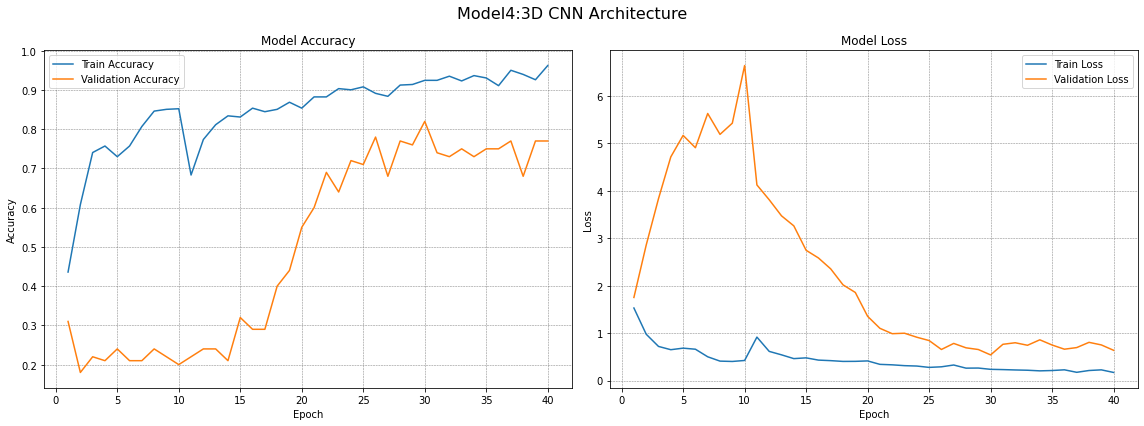

In [58]:
# Plot the Model Accuracy & Loss
plot(model4_3dCNN_fit, 'Model4:3D CNN Architecture', num_epochs)

<hr>

#### Observation:

* The difference between train accuracy(0.92) & validation accuracy(0.81) is 0.1, Overfiiting has been reduced further. Model4 relatively a better model compared to last three models.

* Validation accuracy increases rapidly with smaller learning rate (pow(10,-4)) after 12th epoch. Validation loss is constantly decreasing after the 10th epoch, which is overall a good sign.

* Now let's check the different activation functions as `Leaky ReLU` & `Parametric leaky ReLU (PReLU)` on Model4 Architecture & check the performance.

<hr>

In [109]:
# Add 3D CNN Model4 Run Result to Dataframe
neurons = '16-32-64-128-128(D)-128(D)-5(O)'
filtersize = '3-3-3-3'
activationtype = 'relu, output:softmax'
maxpoolingtype = '2-2-2-1'
dropouttype = '0-0-0-0-0.5-0.5'

col_list = ['3D CNN', neurons, filtersize, activationtype, 'yes', maxpoolingtype, dropouttype, 'Adam', batch_size, num_epochs]
col_list.extend(run4_list)
col_list.extend(['Relatively better Model-Overfitting further reduced.'])

result_table['Model4'] = col_list

# Display the head
display(result_table)

Description                          Model1  \
SL                                                              
0                        Name                          3D CNN   
1              Neurons(L1-L6)  16-32-64-128-128(D)-64(D)-5(O)   
2          Filter Size(L1-L4)                         3-3-3-3   
3           Activation(L1-L6)            relu, output:softmax   
4   BatchNormalization(L1-L6)                             yes   
5           MaxPooling(L1-L4)                         2-2-2-1   
6            Drop-outs(L1-L6)           0.1-0.1-0.1-0.25-0.25   
7                   Optimiser                            Adam   
8                  Batch Size                              30   
9                 Total Epoch                              30   
10                    Epoch #                              30   
11             Train Accuracy                          0.9955   
12        Validation Accuracy                            0.79   
13                 Train Loss                          0.0367   
14            Validation Loss                          0.7807   
15               Total params                         3988677   
16           Trainable params                         3987813   
17       Non-trainable params                             864   
18                 Obervation                   Overfit Model   

                             Model2                         Model3  \
SL                                                                   
0                            3D CNN                         3D CNN   
1   16-32-64-128-128(D)-128(D)-5(O)  16-32-64-128-64(D)-64(D)-5(O)   
2                           3-3-3-3                        3-3-3-3   
3              relu, output:softmax           relu, output:softmax   
4                               yes                            yes   
5                           2-2-2-1                        2-2-2-1   
6               0.3-0.3-0.3-0.4-0.4            0.3-0.3-0.3-0.4-0.4   
7                              Adam                           Adam   
8                                30                             30   
9                                30                             30   
10                               29                             37   
11                           0.9819                         0.9713   
12                             0.67                           0.85   
13                           0.0985                         0.1353   
14                           1.0548                         0.5015   
15                          3997509                        2141061   
16                          3996517                        2140325   
17                              992                            736   
18   Overfit increased than Model1.               Overfit reduced.   

                                               Model4  
SL                                                     
0                                              3D CNN  
1                     16-32-64-128-128(D)-128(D)-5(O)  
2                                             3-3-3-3  
3                                relu, output:softmax  
4                                                 yes  
5                                             2-2-2-1  
6                                     0-0-0-0-0.5-0.5  
7                                                Adam  
8                                                  30  
9                                                  30  
10                                                 30  
11                                             0.9246  
12                                               0.82  
13                                             0.2355  
14                                             0.5392  
15                                            3997509  
16                                            3996517  
17                                                992  
18  Relatively better Model-Overfitting further re...

#### **EX 1: Model 5: Conv3D**
Model4 updated with Leaky ReLU Activation

In [60]:
# Define the 3D Model1
from tensorflow.keras.layers import LeakyReLU

leaky_relu = LeakyReLU(alpha=0.01)

def func_model5_3dcnn(input_shape):
    
    model5_3d = Sequential()
    
    # Layer1
    model5_3d.add(Conv3D(16, (3, 3, 3), padding='same',
                       input_shape=input_shape))
    model5_3d.add(Activation(leaky_relu))
    model5_3d.add(BatchNormalization())
    model5_3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
#     model5_3d.add(Dropout(0.3))
    
    # Layer2
    model5_3d.add(Conv3D(32, (3, 3, 3), padding='same'))
    model5_3d.add(Activation(leaky_relu))
    model5_3d.add(BatchNormalization())
    model5_3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
#     model5_3d.add(Dropout(0.3))
    
    # Layer3
    model5_3d.add(Conv3D(64, (3, 3, 3), padding='same'))
    model5_3d.add(Activation(leaky_relu))
    model5_3d.add(BatchNormalization())
    model5_3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
#     model5_3d.add(Dropout(0.3))
    
    # Layer4
    model5_3d.add(Conv3D(128, (3, 3, 3), padding='same'))
    model5_3d.add(Activation(leaky_relu))
    model5_3d.add(BatchNormalization())
    model5_3d.add(MaxPooling3D(pool_size=(1, 1, 1)))
    model5_3d.add(Dropout(0.5))
    
    model5_3d.add(Flatten()) # Flatenning
    
    # Dense Layer -1
    model5_3d.add(Dense(128,activation=leaky_relu))
    model5_3d.add(BatchNormalization())
    model5_3d.add(Dropout(0.5))
    
    # Dense Layer -2
    model5_3d.add(Dense(128,activation=leaky_relu))
    model5_3d.add(BatchNormalization())
    

    #softmax layer - Output Layer
    model5_3d.add(Dense(5, activation='softmax'))

    # Compile with optimiser (selected Adam Optimiser)
    model5_3d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    
    #Print Model Summary
    print (model5_3d.summary())
    
    # Return 3D CNN Model
    return model5_3d

In [61]:
# 3D CNN Model2 Function call
# Keep the input shape & other parameters such as img_idx is same as Model1
model5_3d = func_model5_3dcnn(input_shape)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_16 (Conv3D)          (None, 13, 120, 120, 16)  1312      
                                                                 
 activation_16 (Activation)  (None, 13, 120, 120, 16)  0         
                                                                 
 batch_normalization_24 (Bat  (None, 13, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_16 (MaxPoolin  (None, 6, 60, 60, 16)    0         
 g3D)                                                            
                                                                 
 conv3d_17 (Conv3D)          (None, 6, 60, 60, 32)     13856     
                                                                 
 activation_17 (Activation)  (None, 6, 60, 60, 32)    

In [62]:
# Batch Size & Epoch - Same as Model1
batch_size = 30
num_epochs = 40

# Call the generator function
train_generator = generator(train_path, train_doc, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols)
val_generator = generator(val_path, val_doc, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols)

In [63]:
model_name = 'Model5_3DCNN' +'_' +'gesture_recognition' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)

# write the REducelronplateau code here
# ModelCheckpoint - saves weight and model after every epoch
LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10, verbose = 0, 
                       mode = "auto", min_delta=0.0001, cooldown = 0, min_lr = 0)
callbacks_list = [checkpoint, LR]

In [64]:
# If there are 100 images and 10 as batch size, then there will be 10 batches and 10 epochs

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)

# If there ar 103 images and 10 as batch size, then there will be 10 epochs for 10 batches and one more epoch for the pending 3 images.
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [65]:
# Model Fitting
model5_3dCNN_fit = model5_3d.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                               callbacks=callbacks_list, validation_data=val_generator,validation_steps=validation_steps, 
                               class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/train/ ; batch size = 30
Epoch 1/40
23/23 [==============================] - 44s 2s/step - loss: 1.4351 - categorical_accuracy: 0.4736 - val_loss: 1.5381 - val_categorical_accuracy: 0.3600 - lr: 0.0010
Epoch 2/40
23/23 [==============================] - 41s 2s/step - loss: 0.9733 - categorical_accuracy: 0.6320 - val_loss: 3.4363 - val_categorical_accuracy: 0.2200 - lr: 0.0010
Epoch 3/40
23/23 [==============================] - 42s 2s/step - loss: 0.8611 - categorical_accuracy: 0.6757 - val_loss: 3.5586 - val_categorical_accuracy: 0.2700 - lr: 0.0010
Epoch 4/40
23/23 [==============================] - 40s 2s/step - loss: 0.6177 - categorical_accuracy: 0.7617 - val_loss: 5.0218 - val_categorical_accuracy: 0.2200 - lr: 0.0010
Epoch 5/40
23/23 [==============================] - 42s 2s/step - loss: 0.4750 - categorical_accuracy: 0.8235 - val_loss: 5.8119 - val_categorical_accuracy: 0.2400 - lr: 0.0010
Epoch 6/40
23/23 [==============================] - 42s 2s/ste

In [66]:
# Print Optimum Output Values
run5_list = model_best_output(model5_3dCNN_fit, model5_3d)

Epoch number @ max(val_acc) =  26
Model Train Accuracy @ max(val_acc) =  0.9789
Model Validation Accuracy @ max(val_acc) =  0.9
Model Train Loss @ max(val_acc) =  0.102
Model Validation Loss @ max(val_acc) =  0.3754
Total params =  3997509
Trainable params =  3996517
Non-trainable params =  992


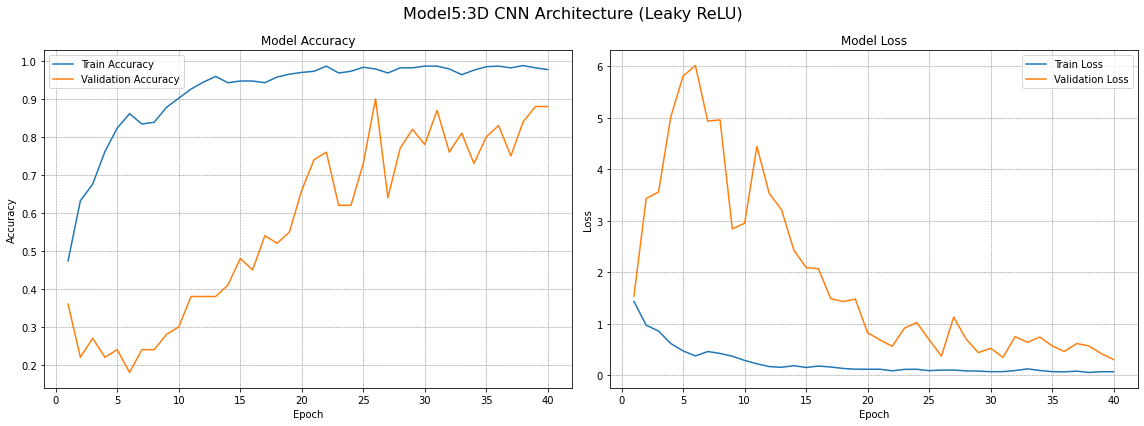

In [67]:
# Plot the Model Accuracy & Loss
plot(model5_3dCNN_fit, 'Model5:3D CNN Architecture (Leaky ReLU)', num_epochs)

<hr>

#### Observation:

* After 5th epoch, validation accuracy increasing constantly with some fluctuation. Validation loss is also decreasing constantly.

* Model 5 Activation Function: `Leaky ReLU` The difference between train accuracy(0.98) & validation accuracy(0.9) is 0.08, Overfiiting has been reduced significantly compared to Model 1, 2 & 3, & somewhat better that Model4.

* Now let's check another activation functions `Parametric leaky ReLU (PReLU)` on Model4 Architecture & check the performance.

<hr>

In [110]:
# Add 3D CNN Model2 Run Result to Dataframe
neurons = '16-32-64-128-128(D)-128(D)-5(O)'
filtersize = '3-3-3-3'
activationtype = 'Leaky ReLU, output:softmax'
maxpoolingtype = '2-2-2-1'
dropouttype = '0-0-0-0-0.5-0.5'

col_list = ['3D CNN', neurons, filtersize, activationtype, 'yes', maxpoolingtype, dropouttype, 'Adam', batch_size, num_epochs]
col_list.extend(run5_list)
col_list.extend(['Model 5 is somewhat better model than Model4'])

result_table['Model5'] = col_list

# Display the head
display(result_table)

Description                          Model1  \
SL                                                              
0                        Name                          3D CNN   
1              Neurons(L1-L6)  16-32-64-128-128(D)-64(D)-5(O)   
2          Filter Size(L1-L4)                         3-3-3-3   
3           Activation(L1-L6)            relu, output:softmax   
4   BatchNormalization(L1-L6)                             yes   
5           MaxPooling(L1-L4)                         2-2-2-1   
6            Drop-outs(L1-L6)           0.1-0.1-0.1-0.25-0.25   
7                   Optimiser                            Adam   
8                  Batch Size                              30   
9                 Total Epoch                              30   
10                    Epoch #                              30   
11             Train Accuracy                          0.9955   
12        Validation Accuracy                            0.79   
13                 Train Loss                          0.0367   
14            Validation Loss                          0.7807   
15               Total params                         3988677   
16           Trainable params                         3987813   
17       Non-trainable params                             864   
18                 Obervation                   Overfit Model   

                             Model2                         Model3  \
SL                                                                   
0                            3D CNN                         3D CNN   
1   16-32-64-128-128(D)-128(D)-5(O)  16-32-64-128-64(D)-64(D)-5(O)   
2                           3-3-3-3                        3-3-3-3   
3              relu, output:softmax           relu, output:softmax   
4                               yes                            yes   
5                           2-2-2-1                        2-2-2-1   
6               0.3-0.3-0.3-0.4-0.4            0.3-0.3-0.3-0.4-0.4   
7                              Adam                           Adam   
8                                30                             30   
9                                30                             30   
10                               29                             37   
11                           0.9819                         0.9713   
12                             0.67                           0.85   
13                           0.0985                         0.1353   
14                           1.0548                         0.5015   
15                          3997509                        2141061   
16                          3996517                        2140325   
17                              992                            736   
18   Overfit increased than Model1.               Overfit reduced.   

                                               Model4  \
SL                                                      
0                                              3D CNN   
1                     16-32-64-128-128(D)-128(D)-5(O)   
2                                             3-3-3-3   
3                                relu, output:softmax   
4                                                 yes   
5                                             2-2-2-1   
6                                     0-0-0-0-0.5-0.5   
7                                                Adam   
8                                                  30   
9                                                  30   
10                                                 30   
11                                             0.9246   
12                                               0.82   
13                                             0.2355   
14                                             0.5392   
15                                            3997509   
16                                            3996517   
17                                                992   
18  Relatively better Model-Overfitting f

#### **EX 1: Model 6: Conv3D**
Model4 updated with Parametric leaky ReLU (PReLU) Activation for last two Dense Layers

In [69]:
# Define the 3D Model1
from tensorflow.keras.layers import PReLU

para_relu = PReLU()

def func_model6_3dcnn(input_shape):
    
    model6_3d = Sequential()
    
    # Layer1
    model6_3d.add(Conv3D(16, (3, 3, 3), padding='same',
                       input_shape=input_shape))
    model6_3d.add(Activation('relu'))
    model6_3d.add(BatchNormalization())
    model6_3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
    
    # Layer2
    model6_3d.add(Conv3D(32, (3, 3, 3), padding='same'))
    model6_3d.add(Activation('relu'))
    model6_3d.add(BatchNormalization())
    model6_3d.add(MaxPooling3D(pool_size=(2, 2, 2)))

    
    # Layer3
    model6_3d.add(Conv3D(64, (3, 3, 3), padding='same'))
    model6_3d.add(Activation('relu'))
    model6_3d.add(BatchNormalization())
    model6_3d.add(MaxPooling3D(pool_size=(2, 2, 2)))
    
    # Layer4
    model6_3d.add(Conv3D(128, (3, 3, 3), padding='same'))
    model6_3d.add(Activation('relu'))
    model6_3d.add(BatchNormalization())
    model6_3d.add(MaxPooling3D(pool_size=(1, 1, 1)))
    model6_3d.add(Dropout(0.5))
    
    model6_3d.add(Flatten()) # Flatenning
    
    # Dense Layer -1
    model6_3d.add(Dense(128,activation=para_relu))
    model6_3d.add(BatchNormalization())
    model6_3d.add(Dropout(0.5))
    
    # Dense Layer -2
    model6_3d.add(Dense(128,activation=para_relu))
    model6_3d.add(BatchNormalization())
    

    #softmax layer - Output Layer
    model6_3d.add(Dense(5, activation='softmax'))

    # Compile with optimiser (selected Adam Optimiser)
    model6_3d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    
    #Print Model Summary
    print (model6_3d.summary())
    
    # Return 3D CNN Model
    return model6_3d

In [70]:
# 3D CNN Model2 Function call
# Keep the input shape & other parameters such as img_idx is same as Model1
model6_3d = func_model6_3dcnn(input_shape)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_20 (Conv3D)          (None, 13, 120, 120, 16)  1312      
                                                                 
 activation_20 (Activation)  (None, 13, 120, 120, 16)  0         
                                                                 
 batch_normalization_30 (Bat  (None, 13, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_20 (MaxPoolin  (None, 6, 60, 60, 16)    0         
 g3D)                                                            
                                                                 
 conv3d_21 (Conv3D)          (None, 6, 60, 60, 32)     13856     
                                                                 
 activation_21 (Activation)  (None, 6, 60, 60, 32)    

In [71]:
# Batch Size & Epoch - Same as Model1
batch_size = 30
num_epochs = 40

# Call the generator function
train_generator = generator(train_path, train_doc, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols)
val_generator = generator(val_path, val_doc, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols)

In [72]:
model_name = 'Model6_3DCNN' +'_' +'gesture_recognition' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)

# write the REducelronplateau code here
# ModelCheckpoint - saves weight and model after every epoch
LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10, verbose = 0, 
                       mode = "auto", min_delta=0.0001, cooldown = 0, min_lr = 0)
callbacks_list = [checkpoint, LR]

In [73]:
# If there are 100 images and 10 as batch size, then there will be 10 batches and 10 epochs

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)

# If there ar 103 images and 10 as batch size, then there will be 10 epochs for 10 batches and one more epoch for the pending 3 images.
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [74]:
# Model Fitting
model6_3dCNN_fit = model6_3d.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                               callbacks=callbacks_list, validation_data=val_generator,validation_steps=validation_steps, 
                               class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/train/ ; batch size = 30
Epoch 1/40
23/23 [==============================] - 43s 2s/step - loss: 1.4470 - categorical_accuracy: 0.4480 - val_loss: 1.7155 - val_categorical_accuracy: 0.3700 - lr: 0.0010
Epoch 2/40
23/23 [==============================] - 40s 2s/step - loss: 0.9410 - categorical_accuracy: 0.6320 - val_loss: 2.2985 - val_categorical_accuracy: 0.2900 - lr: 0.0010
Epoch 3/40
23/23 [==============================] - 40s 2s/step - loss: 0.7114 - categorical_accuracy: 0.7376 - val_loss: 3.6480 - val_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 4/40
23/23 [==============================] - 39s 2s/step - loss: 0.5146 - categorical_accuracy: 0.8084 - val_loss: 4.5966 - val_categorical_accuracy: 0.1800 - lr: 0.0010
Epoch 5/40
23/23 [==============================] - 40s 2s/step - loss: 0.3646 - categorical_accuracy: 0.8688 - val_loss: 4.9451 - val_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 6/40
23/23 [==============================] - 41s 2s/ste

23/23 [==============================] - 40s 2s/step - loss: 0.1347 - categorical_accuracy: 0.9578 - val_loss: 0.5451 - val_categorical_accuracy: 0.8100 - lr: 1.0000e-04
Epoch 28/40
23/23 [==============================] - 40s 2s/step - loss: 0.1219 - categorical_accuracy: 0.9668 - val_loss: 0.5343 - val_categorical_accuracy: 0.7700 - lr: 1.0000e-04
Epoch 29/40
23/23 [==============================] - 40s 2s/step - loss: 0.1270 - categorical_accuracy: 0.9713 - val_loss: 0.4924 - val_categorical_accuracy: 0.8100 - lr: 1.0000e-04
Epoch 30/40
23/23 [==============================] - 41s 2s/step - loss: 0.1415 - categorical_accuracy: 0.9593 - val_loss: 0.9922 - val_categorical_accuracy: 0.7100 - lr: 1.0000e-04
Epoch 31/40
23/23 [==============================] - 41s 2s/step - loss: 0.1360 - categorical_accuracy: 0.9623 - val_loss: 0.5406 - val_categorical_accuracy: 0.8200 - lr: 1.0000e-04
Epoch 32/40
23/23 [==============================] - 39s 2s/step - loss: 0.1286 - categorical_accuracy

In [75]:
# Print Optimum Output Values
run6_list = model_best_output(model6_3dCNN_fit, model6_3d)

Epoch number @ max(val_acc) =  36
Model Train Accuracy @ max(val_acc) =  0.9804
Model Validation Accuracy @ max(val_acc) =  0.88
Model Train Loss @ max(val_acc) =  0.096
Model Validation Loss @ max(val_acc) =  0.4507
Total params =  3997637
Trainable params =  3996645
Non-trainable params =  992


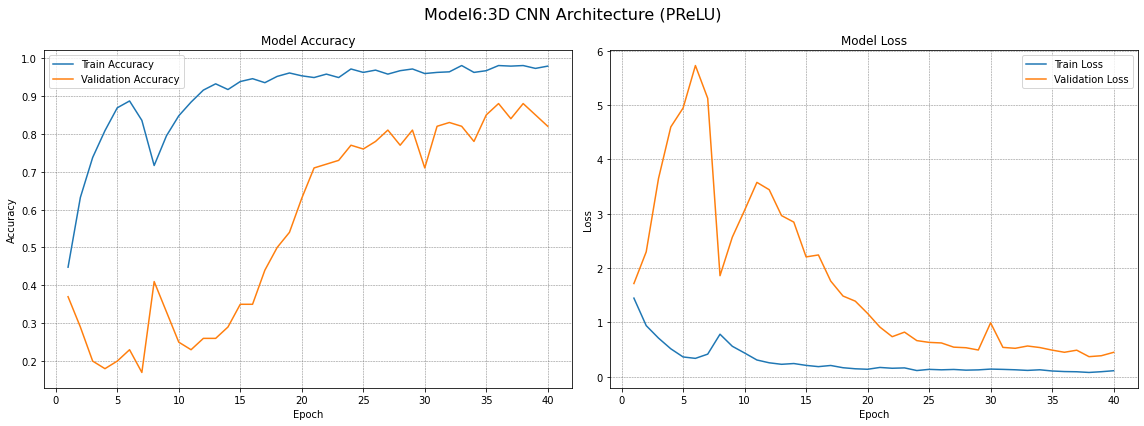

In [76]:
# Plot the Model Accuracy & Loss
plot(model6_3dCNN_fit, 'Model6:3D CNN Architecture (PReLU)', num_epochs)

In [111]:
# Add 3D CNN Model2 Run Result to Dataframe
neurons = '16-32-64-128-128(D)-128(D)-5(O)'
filtersize = '3-3-3-3'
activationtype = 'PReLU, output:softmax'
maxpoolingtype = '2-2-2-1'
dropouttype = '0-0-0-0-0.5-0.5'

col_list = ['3D CNN', neurons, filtersize, activationtype, 'yes', maxpoolingtype, dropouttype, 'Adam', batch_size, num_epochs]
col_list.extend(run6_list)
col_list.extend(['Better than Model4 in terms of accuracy, but Model5 is somewhat better than Model6'])

result_table['Model6'] = col_list

# Display the head
display(result_table)

Description                          Model1  \
SL                                                              
0                        Name                          3D CNN   
1              Neurons(L1-L6)  16-32-64-128-128(D)-64(D)-5(O)   
2          Filter Size(L1-L4)                         3-3-3-3   
3           Activation(L1-L6)            relu, output:softmax   
4   BatchNormalization(L1-L6)                             yes   
5           MaxPooling(L1-L4)                         2-2-2-1   
6            Drop-outs(L1-L6)           0.1-0.1-0.1-0.25-0.25   
7                   Optimiser                            Adam   
8                  Batch Size                              30   
9                 Total Epoch                              30   
10                    Epoch #                              30   
11             Train Accuracy                          0.9955   
12        Validation Accuracy                            0.79   
13                 Train Loss                          0.0367   
14            Validation Loss                          0.7807   
15               Total params                         3988677   
16           Trainable params                         3987813   
17       Non-trainable params                             864   
18                 Obervation                   Overfit Model   

                             Model2                         Model3  \
SL                                                                   
0                            3D CNN                         3D CNN   
1   16-32-64-128-128(D)-128(D)-5(O)  16-32-64-128-64(D)-64(D)-5(O)   
2                           3-3-3-3                        3-3-3-3   
3              relu, output:softmax           relu, output:softmax   
4                               yes                            yes   
5                           2-2-2-1                        2-2-2-1   
6               0.3-0.3-0.3-0.4-0.4            0.3-0.3-0.3-0.4-0.4   
7                              Adam                           Adam   
8                                30                             30   
9                                30                             30   
10                               29                             37   
11                           0.9819                         0.9713   
12                             0.67                           0.85   
13                           0.0985                         0.1353   
14                           1.0548                         0.5015   
15                          3997509                        2141061   
16                          3996517                        2140325   
17                              992                            736   
18   Overfit increased than Model1.               Overfit reduced.   

                                               Model4  \
SL                                                      
0                                              3D CNN   
1                     16-32-64-128-128(D)-128(D)-5(O)   
2                                             3-3-3-3   
3                                relu, output:softmax   
4                                                 yes   
5                                             2-2-2-1   
6                                     0-0-0-0-0.5-0.5   
7                                                Adam   
8                                                  30   
9                                                  30   
10                                                 30   
11                                             0.9246   
12                                               0.82   
13                                             0.2355   
14                                             0.5392   
15                                            3997509   
16                                            3996517   
17                                                992   
18  Relatively better Model-Overfitting f

<hr>

#### Observation:

* Model 6 Activation Function: `Parametric leaky ReLU (PReLU)` The difference between train accuracy(0.93) & validation accuracy(0.86) is 0.07, Overfiiting has been reduced significantly compared to Model 1, 2 & 3. Model6 & Model4 are similar in terms of overfittig issue. 

* Training & Validation Accuracy of Model 4 is fairer than Model 6.

* Out of all six models of 3D CNN, Model 4 has outperformed the remaining four other models (Model 1, 2, 3, 6). Model 4 is just a little bit better than Model 5. 

* The variable `img_idx` can be more play off in order to fine tune the 3D CNN Model. Although Model 4 is accepted 3D CNN out of total six models tested here, but there is always a scope of improvement with more testing. 
<hr>

#### **EX 2: Model 7: Conv2D + RNN (GRU)**

In this Model test, we will use the Transfer Learning of ResNet50 (2D CNN) & feed the same into the RNN (GRU) to compare the performance. We will try to keep the RNN (GRU) model as simple as possible, keeping in view of machine hardware limitations.

In [78]:
# Import the libraries
from tensorflow.keras.layers import TimeDistributed,GRU,Conv2D,LSTM
from tensorflow.keras.applications.resnet50 import ResNet50

In [79]:
# Resnet pooling set to average
RESNET50_POOLING_AVERAGE = 'avg'

# Call the ResNet50
resnet = ResNet50(include_top=False, pooling = RESNET50_POOLING_AVERAGE,
                  weights='imagenet',input_shape=(120,120,3))

In [80]:
# Define Resnet50 Model
for layer in resnet.layers[:-10]:
    layer.trainable=False

model_resnet50 = Sequential([resnet,Flatten()])

# ResNet50 Summary
model_resnet50.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
Total params: 23,587,712
Trainable params: 3,416,576
Non-trainable params: 20,171,136
_________________________________________________________________


In [81]:
# Define the RNN (GRU) Network
model_rnn_GRU = Sequential()
model_rnn_GRU.add(TimeDistributed(model_resnet50,input_shape=input_shape))
model_rnn_GRU.add(GRU(16,return_sequences=True))
model_rnn_GRU.add(GRU(8))
model_rnn_GRU.add(Dense(5,activation='softmax'))

In [82]:
# Final Network Summary
model_rnn_GRU.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 13, 2048)         23587712  
 ibuted)                                                         
                                                                 
 gru (GRU)                   (None, 13, 16)            99168     
                                                                 
 gru_1 (GRU)                 (None, 8)                 624       
                                                                 
 dense_18 (Dense)            (None, 5)                 45        
                                                                 
Total params: 23,687,549
Trainable params: 3,516,413
Non-trainable params: 20,171,136
_________________________________________________________________


In [83]:
# Compile with optimiser (selected Adam Optimiser)
model_rnn_GRU.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [84]:
# Batch Size & Epoch - Same as Model1
batch_size = 30
num_epochs = 30

# Call the generator function
train_generator = generator(train_path, train_doc, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols)
val_generator = generator(val_path, val_doc, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols)

In [85]:
model_name = 'Model7_2DCNN_RNN_GRU' +'_' +'gesture_recognition' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)

# write the REducelronplateau code here
# ModelCheckpoint - saves weight and model after every epoch
LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10, verbose = 0, 
                       mode = "auto", min_delta=0.0001, cooldown = 0, min_lr = 0)
callbacks_list = [checkpoint, LR]

In [86]:
# If there are 100 images and 10 as batch size, then there will be 10 batches and 10 epochs

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)

# If there ar 103 images and 10 as batch size, then there will be 10 epochs for 10 batches and one more epoch for the pending 3 images.
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [87]:
# Model Fitting
model_rnn_GRU_fit = model_rnn_GRU.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                               callbacks=callbacks_list, validation_data=val_generator,validation_steps=validation_steps, 
                               class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/train/ ; batch size = 30
Epoch 1/30
23/23 [==============================] - 237s 9s/step - loss: 1.5964 - categorical_accuracy: 0.2760 - val_loss: 1.6897 - val_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 202s 9s/step - loss: 1.4508 - categorical_accuracy: 0.3891 - val_loss: 1.6829 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 202s 9s/step - loss: 1.3418 - categorical_accuracy: 0.4630 - val_loss: 1.6556 - val_categorical_accuracy: 0.2700 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 203s 9s/step - loss: 1.2410 - categorical_accuracy: 0.5234 - val_loss: 1.4864 - val_categorical_accuracy: 0.3800 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 199s 9s/step - loss: 1.1772 - categorical_accuracy: 0.5732 - val_loss: 1.4495 - val_categorical_accuracy: 0.3300 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 204s 

In [88]:
# Print Optimum Output Values
run7_list = model_best_output(model_rnn_GRU_fit, model_rnn_GRU)

Epoch number @ max(val_acc) =  30
Model Train Accuracy @ max(val_acc) =  0.9427
Model Validation Accuracy @ max(val_acc) =  0.66
Model Train Loss @ max(val_acc) =  0.3704
Model Validation Loss @ max(val_acc) =  1.0827
Total params =  23687549
Trainable params =  3516413
Non-trainable params =  20171136


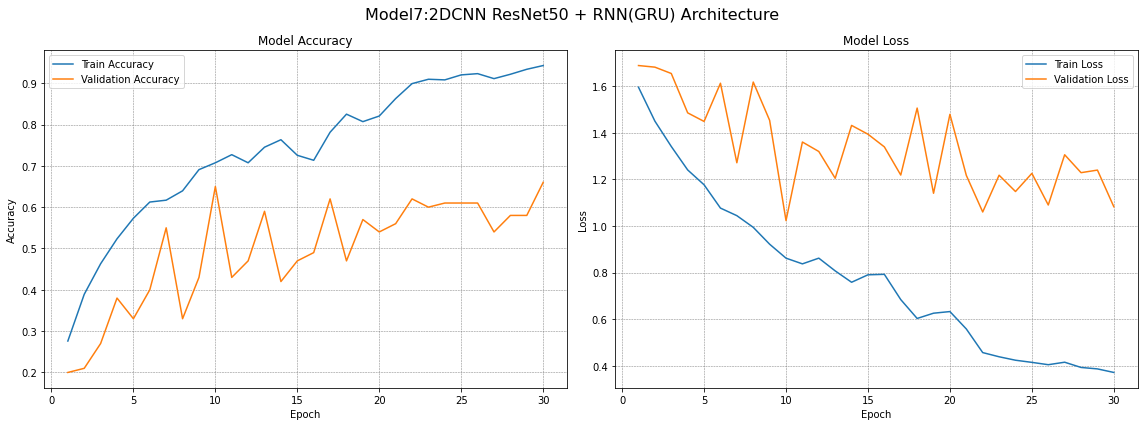

In [89]:
# Plot the Model Accuracy & Loss
plot(model_rnn_GRU_fit, 'Model7:2DCNN ResNet50 + RNN(GRU) Architecture', num_epochs)

In [113]:
# Add 2DCNN + RNN(GRU) Model7 Run Result to Dataframe
neurons = 'ResNet50(L(-10),TimeDistributed)-16(GRU)-8(GRU)-5(O)'
filtersize = ''
activationtype = 'output:softmax'
maxpoolingtype = ''
dropouttype = ''

col_list = ['2DCNN ResNet50+RNN(GRU)', neurons, filtersize, activationtype, 'no', maxpoolingtype, dropouttype, 'Adam', batch_size, num_epochs]
col_list.extend(run7_list)
col_list.extend(['Overfit Model. Network tweaking further required'])

result_table['Model7'] = col_list

# Display the head
display(result_table)

Description                          Model1  \
SL                                                              
0                        Name                          3D CNN   
1              Neurons(L1-L6)  16-32-64-128-128(D)-64(D)-5(O)   
2          Filter Size(L1-L4)                         3-3-3-3   
3           Activation(L1-L6)            relu, output:softmax   
4   BatchNormalization(L1-L6)                             yes   
5           MaxPooling(L1-L4)                         2-2-2-1   
6            Drop-outs(L1-L6)           0.1-0.1-0.1-0.25-0.25   
7                   Optimiser                            Adam   
8                  Batch Size                              30   
9                 Total Epoch                              30   
10                    Epoch #                              30   
11             Train Accuracy                          0.9955   
12        Validation Accuracy                            0.79   
13                 Train Loss                          0.0367   
14            Validation Loss                          0.7807   
15               Total params                         3988677   
16           Trainable params                         3987813   
17       Non-trainable params                             864   
18                 Obervation                   Overfit Model   

                             Model2                         Model3  \
SL                                                                   
0                            3D CNN                         3D CNN   
1   16-32-64-128-128(D)-128(D)-5(O)  16-32-64-128-64(D)-64(D)-5(O)   
2                           3-3-3-3                        3-3-3-3   
3              relu, output:softmax           relu, output:softmax   
4                               yes                            yes   
5                           2-2-2-1                        2-2-2-1   
6               0.3-0.3-0.3-0.4-0.4            0.3-0.3-0.3-0.4-0.4   
7                              Adam                           Adam   
8                                30                             30   
9                                30                             30   
10                               29                             37   
11                           0.9819                         0.9713   
12                             0.67                           0.85   
13                           0.0985                         0.1353   
14                           1.0548                         0.5015   
15                          3997509                        2141061   
16                          3996517                        2140325   
17                              992                            736   
18   Overfit increased than Model1.               Overfit reduced.   

                                               Model4  \
SL                                                      
0                                              3D CNN   
1                     16-32-64-128-128(D)-128(D)-5(O)   
2                                             3-3-3-3   
3                                relu, output:softmax   
4                                                 yes   
5                                             2-2-2-1   
6                                     0-0-0-0-0.5-0.5   
7                                                Adam   
8                                                  30   
9                                                  30   
10                                                 30   
11                                             0.9246   
12                                               0.82   
13                                             0.2355   
14                                             0.5392   
15                                            3997509   
16                                            3996517   
17                                                992   
18  Relatively better Model-Overfitting f

<hr>

#### Observation:

*  Overfit Model. Network tweaking further required to improve the model output.
 
<hr>

#### **EX 2: Model 8: Conv2D + RNN (LSTM)**

In this Model test, we will use the Transfer Learning of ResNet50 (2D CNN) & feed the same into the RNN (LSTM) to compare the performance. We will try to keep the RNN (LSTM) model as simple as possible, keeping in view of machine hardware limitations.

In [91]:
# Define the RNN (LSTM) Network
model_rnn_LSTM = Sequential()
model_rnn_LSTM.add(TimeDistributed(model_resnet50,input_shape=input_shape))
model_rnn_LSTM.add(LSTM(16,return_sequences=True))
model_rnn_LSTM.add(LSTM(8))
model_rnn_LSTM.add(Dense(5,activation='softmax'))

In [92]:
# Final Network Summary
model_rnn_LSTM.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_1 (TimeDis  (None, 13, 2048)         23587712  
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 13, 16)            132160    
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_19 (Dense)            (None, 5)                 45        
                                                                 
Total params: 23,720,717
Trainable params: 3,549,581
Non-trainable params: 20,171,136
_________________________________________________________________


In [93]:
# Compile with optimiser (selected Adam Optimiser)
model_rnn_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [94]:
# Batch Size & Epoch - Same as Model1
batch_size = 30
num_epochs = 30

# Call the generator function
train_generator = generator(train_path, train_doc, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols)
val_generator = generator(val_path, val_doc, batch_size, img_idx, nframes, img_dim_rows, img_dim_cols)

In [95]:
model_name = 'Model8_2DCNN_RNN_LSTM' +'_' +'gesture_recognition' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)

# write the REducelronplateau code here
# ModelCheckpoint - saves weight and model after every epoch
LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10, verbose = 0, 
                       mode = "auto", min_delta=0.0001, cooldown = 0, min_lr = 0)
callbacks_list = [checkpoint, LR]

In [96]:
# If there are 100 images and 10 as batch size, then there will be 10 batches and 10 epochs

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)

# If there ar 103 images and 10 as batch size, then there will be 10 epochs for 10 batches and one more epoch for the pending 3 images.
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [97]:
# Model Fitting
model_rnn_LSTM_fit = model_rnn_LSTM.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                               callbacks=callbacks_list, validation_data=val_generator,validation_steps=validation_steps, 
                               class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/train/ ; batch size = 30
Epoch 1/30
23/23 [==============================] - 95s 3s/step - loss: 1.3493 - categorical_accuracy: 0.4992 - val_loss: 1.4751 - val_categorical_accuracy: 0.4500 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - 66s 3s/step - loss: 1.0734 - categorical_accuracy: 0.7179 - val_loss: 1.2829 - val_categorical_accuracy: 0.4300 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - 144s 6s/step - loss: 0.9045 - categorical_accuracy: 0.8145 - val_loss: 1.3659 - val_categorical_accuracy: 0.4500 - lr: 0.0010
Epoch 4/30
23/23 [==============================] - 154s 7s/step - loss: 0.8629 - categorical_accuracy: 0.7964 - val_loss: 1.3010 - val_categorical_accuracy: 0.5100 - lr: 0.0010
Epoch 5/30
23/23 [==============================] - 156s 7s/step - loss: 0.7837 - categorical_accuracy: 0.8069 - val_loss: 1.4638 - val_categorical_accuracy: 0.4400 - lr: 0.0010
Epoch 6/30
23/23 [==============================] - 156s 7s

In [98]:
# Print Optimum Output Values
run8_list = model_best_output(model_rnn_LSTM_fit, model_rnn_LSTM)

Epoch number @ max(val_acc) =  27
Model Train Accuracy @ max(val_acc) =  0.9744
Model Validation Accuracy @ max(val_acc) =  0.64
Model Train Loss @ max(val_acc) =  0.2122
Model Validation Loss @ max(val_acc) =  1.1547
Total params =  23720717
Trainable params =  3549581
Non-trainable params =  20171136


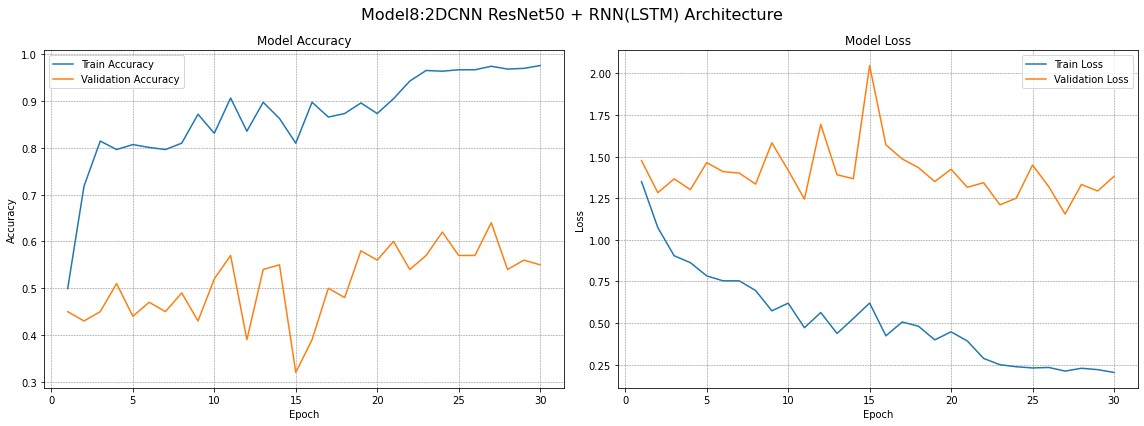

In [99]:
# Plot the Model Accuracy & Loss
plot(model_rnn_LSTM_fit, 'Model8:2DCNN ResNet50 + RNN(LSTM) Architecture', num_epochs)

In [114]:
# Add 2DCNN+RNN(LSTM) Model8 Run Result to Dataframe
neurons = 'ResNet50(L(-10),TimeDistributed)-16(LSTM)-8(LSTM)-5(O)'
filtersize = ''
activationtype = 'output:softmax'
maxpoolingtype = ''
dropouttype = ''

col_list = ['2DCNN ResNet50+RNN(LSTM)', neurons, filtersize, activationtype, 'no', maxpoolingtype, dropouttype, 'Adam', batch_size, num_epochs]
col_list.extend(run8_list)
col_list.extend(['Overfit Model. Network tweaking further required'])

result_table['Model8'] = col_list

# Display the head
display(result_table)

Description                          Model1  \
SL                                                              
0                        Name                          3D CNN   
1              Neurons(L1-L6)  16-32-64-128-128(D)-64(D)-5(O)   
2          Filter Size(L1-L4)                         3-3-3-3   
3           Activation(L1-L6)            relu, output:softmax   
4   BatchNormalization(L1-L6)                             yes   
5           MaxPooling(L1-L4)                         2-2-2-1   
6            Drop-outs(L1-L6)           0.1-0.1-0.1-0.25-0.25   
7                   Optimiser                            Adam   
8                  Batch Size                              30   
9                 Total Epoch                              30   
10                    Epoch #                              30   
11             Train Accuracy                          0.9955   
12        Validation Accuracy                            0.79   
13                 Train Loss                          0.0367   
14            Validation Loss                          0.7807   
15               Total params                         3988677   
16           Trainable params                         3987813   
17       Non-trainable params                             864   
18                 Obervation                   Overfit Model   

                             Model2                         Model3  \
SL                                                                   
0                            3D CNN                         3D CNN   
1   16-32-64-128-128(D)-128(D)-5(O)  16-32-64-128-64(D)-64(D)-5(O)   
2                           3-3-3-3                        3-3-3-3   
3              relu, output:softmax           relu, output:softmax   
4                               yes                            yes   
5                           2-2-2-1                        2-2-2-1   
6               0.3-0.3-0.3-0.4-0.4            0.3-0.3-0.3-0.4-0.4   
7                              Adam                           Adam   
8                                30                             30   
9                                30                             30   
10                               29                             37   
11                           0.9819                         0.9713   
12                             0.67                           0.85   
13                           0.0985                         0.1353   
14                           1.0548                         0.5015   
15                          3997509                        2141061   
16                          3996517                        2140325   
17                              992                            736   
18   Overfit increased than Model1.               Overfit reduced.   

                                               Model4  \
SL                                                      
0                                              3D CNN   
1                     16-32-64-128-128(D)-128(D)-5(O)   
2                                             3-3-3-3   
3                                relu, output:softmax   
4                                                 yes   
5                                             2-2-2-1   
6                                     0-0-0-0-0.5-0.5   
7                                                Adam   
8                                                  30   
9                                                  30   
10                                                 30   
11                                             0.9246   
12                                               0.82   
13                                             0.2355   
14                                             0.5392   
15                                            3997509   
16                                            3996517   
17                                                992   
18  Relatively better Model-Overfitting f

In [115]:
# saving the dataframe into csv file
result_table.to_csv('model_result_table.csv')


#### Observation:

*  Overfit Model. Network tweaking further required to improve the model output.

<hr>

<h4>
<font color=Green>Model Run Summary:</font>

<font color=Blue>1. 2D CNN + RNN (both GRU & LSTM) need further tweaking in the Network architecture in order to improve the overfitting issue. Since due to limitation of hardware resource, it is not being further tested as of now. </font>

<font color=Blue>2. Model4 (activation: `relu`) , Model5 (activation: `Leaky ReLU`) & Model6 (activation: `PReLU`) are more or less have given the similar performance. Out of these these three among the total tested eight models, Model5 is final selected model, which is a 3DCNN architecture Neural Network Model. </font> 

<hr>